In [1]:
import numpy as np 
import pandas as pd
import csv 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import os 
os.chdir("/Users/susanchen/Desktop/Korean_skin_care/Sokoglam")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/susanchen/Desktop/Korean_skin_care/Sokoglam'

## Loading the 4 data files 

All data files are available on my [Github](https://github.com/sc6354/Korean-Skincare-Recommender).

In [2]:
oily = pd.read_csv("oily.csv")
dry = pd.read_csv('dry.csv')
norm = pd.read_csv('normal.csv')
combo = pd.read_csv('combination.csv')

#### For each dataset, we add columns (Oily, Dry, Normal, and Combination) to represent what skin type the product is suitable for. A value of 1 represents suitability, i.e. 1 in the Dry column means the product suits dry skin types. 

In [3]:
oily["Oily"] = 1
oily["Dry"] = 0
oily["Normal"] = 0
oily["Combination"] = 0

In [4]:
dry["Oily"] = 0
dry["Dry"] = 1
dry["Normal"] = 0
dry["Combination"] = 0

In [5]:
norm["Oily"] = 0
norm["Dry"] = 0
norm["Normal"] = 1
norm["Combination"] = 0

In [6]:
combo["Oily"] = 0
combo["Dry"] = 0
combo["Normal"] = 0
combo["Combination"] = 1

In [7]:
frames= [oily, dry, norm, combo]
Master = pd.concat(frames)

## Removing Duplicates and Product Sets

Some products are suitable for more than one skin type. We will need to check which rows are duplicates, set them aside, and extract valuable information from them.


In [42]:
# Remove Duplicates
new_Master = Master.duplicated(subset = 'Product', keep = 'first')
# create a dataframe for duplicates
duplicates = Master[new_Master]
# create a dataframe for the new data
df = Master[~new_Master]

In [43]:
# take a look at df to make sure everything checks out
df

,Product,Brand,Description,Ingredients,Price,Oily,Dry,Normal,Combination
0,Licorice Loves Exclusive Duo Set,ACWELL,**$66 value!After reading your rave reviews an...,Licorice pH Balancing Cleansing Toner :\r\nWat...,46,1,0,0,0
1,Green Pearlsation PHA Calming Toner,KLAVUU,"Softer, more hydrated skin is at your fingerti...","Water, Melaleuca Alternifolia (Tea Tree) Leaf ...",19,1,0,0,0
2,Pure Pearlsation pH Balancing Quick Cleansing Pad,KLAVUU,Even the most stubborn of makeup comes off in ...,"Water, Dipropylene Glycol, Diethoxyethyl Suc...",17.5,1,0,0,0
3,AC Clear Magic Gel,THE PLANT BASE,This targeted treatment gel controls breakout-...,"Centella Asiatica Leaf Extract (78.54%) ,Butyl...",23,1,0,0,0
4,Real Flower Cleansing Water—Calendula,NEOGEN,Featured in the Ipsy Glam BagIf natural beauty...,"Water, PEG-6 Caprylic/Capric Glycerides, Calen...",22,1,0,0,0
...,...,...,...,...,...,...,...,...,...
95,5-Step Combination Skin Set,SOKO GLAM EXCLUSIVE,Exclusive to Soko Glam**Over $132 Value!Click ...,NaN,95,0,0,0,1
114,5-Step Anti-Aging Set,SOKO GLAM EXCLUSIVE,Exclusive to Soko Glam**Over $144 value Achiev...,NaN,95,0,0,0,1
124,Pure Pearlsation Divine Pearl Cleansing Oil,KLAVUU,This rich oil cleanser removes oil-based impur...,"Mineral oil, carthamus tinctorius (safflower) ...",35,0,0,0,1
140,A'pieu Real Big Yogurt One-Bottle (Plain),A'PIEU,Yogurt is more than a nutritious breakfast! Yo...,"Water, Propanediol, 1,2-Hexanediol, Hydroxyace...",2,0,0,0,1


Properly copy the one-hot encoding for skin types from the Duplicates dataframe to df. The result should be a dataframe with products that have 1's in more than one skin type column. 

In [44]:
for i in range(len(duplicates)):

    ## Products that are also suitable for Oily skin types 
    if (duplicates.iloc[i][5] == 1):
        prod = duplicates.iloc[i][0]
        df.loc[df['Product'] == prod,['Oily']] = 1
        
    # Product that are also suitable for dry skin types
    elif (duplicates.iloc[i][6] == 1):
        prod = duplicates.iloc[i][0]
        df.loc[df["Product"] == prod, ['Dry']] == 1
    
    ## Products that are also suitable for Normal skin types 
    elif (duplicates.iloc[i][7] == 1):
        prod = duplicates.iloc[i][0]
        df.loc[df['Product'] == prod,['Normal']] = 1

    # Product that are also suitable for Combination skin types
    elif (duplicates.iloc[i][8] == 1):
        prod = duplicates.iloc[i][0]
        df.loc[df["Product"] == prod, ['Combination']] == 1


df.to_csv('Master.csv', index= False)

In [45]:
# examine df 
df.head(10)
#df.loc[df['Oily'] == 1]

,Product,Brand,Description,Ingredients,Price,Oily,Dry,Normal,Combination
0,Licorice Loves Exclusive Duo Set,ACWELL,**$66 value!After reading your rave reviews an...,Licorice pH Balancing Cleansing Toner :\r\nWat...,46,1,0,1,0
1,Green Pearlsation PHA Calming Toner,KLAVUU,"Softer, more hydrated skin is at your fingerti...","Water, Melaleuca Alternifolia (Tea Tree) Leaf ...",19,1,0,0,0
2,Pure Pearlsation pH Balancing Quick Cleansing Pad,KLAVUU,Even the most stubborn of makeup comes off in ...,"Water, Dipropylene Glycol, Diethoxyethyl Suc...",17.5,1,0,1,0
3,AC Clear Magic Gel,THE PLANT BASE,This targeted treatment gel controls breakout-...,"Centella Asiatica Leaf Extract (78.54%) ,Butyl...",23,1,0,0,0
4,Real Flower Cleansing Water—Calendula,NEOGEN,Featured in the Ipsy Glam BagIf natural beauty...,"Water, PEG-6 Caprylic/Capric Glycerides, Calen...",22,1,0,0,0
5,Soft Shield Pimple Patch,the klog,Exclusively Available at Soko Glam!Using near-...,Hydrocolloid\n,6,1,0,1,0
6,Time Revolution Artemisia Treatment Essence,MISSHA,"Heal and nourish red, sensitized skin with thi...",100% Artemisia annua extract\n,55,1,0,0,0
7,Fundamental Water Gel Cream,KLAIRS,Deeply hydrate and strengthen parched skin wit...,"Camellia Sinensis Leaf Water, Butylene Glycol,...",31,1,0,1,0
8,Pore Clarifying Toner 10% Glycolic Acid,SATURDAY SKIN,Take control of your skin care journey with th...,"Water/Aqua/Eau, Glycolic Acid, Hamamelis Virgi...",30,1,0,0,0
9,5-Step Brightening Set,SOKO GLAM EXCLUSIVE,Exclusive to Soko Glam**Over $125 Value!If you...,NaN,95,1,0,0,0


### 
These products had a discount price, however we need only the current price at the time. So we will remove the discount price.

In [51]:
data['Price'] = data['Price'].replace(['38\n30.40'],'30.40')
data['Price'] = data['Price'].replace(['38\n26'],'26.00')
data['Price'] = data['Price'].replace(['88\n70.40'],'70.40')
data['Price'] = data['Price'].replace(['26\n13'],'13.00')

data['Price'] = data['Price'].astype(float)

In [52]:
# remove sets from the dataframe 
data.drop(data[data["Ingredients"] == "nan"].index, inplace = True) 
data = data.reset_index(drop=True)

In [49]:
# save dataframe as Master
data = pd.read_csv('Master.csv')

## Functions for later

In [ ]:
def clean (text):
    clean_text = []
    for i in text:
        i = i.strip().lower()
        clean_text.append(i)
    return clean_text

def get_index_from_combined_data(iList):
    return data[data["combined"]== iList].index.values[0]
    #return data[data.Ingredients == iList]["Product"].values[0]

def get_index_from_list(iList):
    return data[data["Ingredients"]== iList].index.values[0]

def get_product_from_index(index):
    return data[data.index == index]["Product"].values[0]
    #print(data[data["Product"]== "Licorice Loves Exclusive Duo Set"].index.values)

def get_brand_from_index(index):
    return data[data.index == index]["Brand"].values[0]

## Quick Visualization of Prices

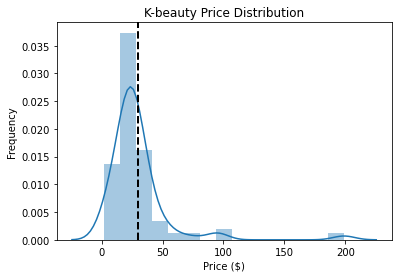

In [55]:
plot1 = sns.distplot(data["Price"], bins = 15)
plt.title('K-beauty Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.axvline(data['Price'].mean(), color = 'black', linestyle='dashed', linewidth=2)
plt.savefig('Price_distribution.png')

## Check the distribution of each skin type

In [56]:
s_type = ['Oily', "Dry", "Combination", "Normal"]
for s in s_type:
    print(data[s].value_counts(1))
# Based on the percentages of 1 for each Skin Type column, the dataset is fairly representative of the general population of skin types. 

0    0.623574
1    0.376426
Name: Oily, dtype: float64
0    0.570342
1    0.429658
Name: Dry, dtype: float64
0    0.931559
1    0.068441
Name: Combination, dtype: float64
0    0.528517
1    0.471483
Name: Normal, dtype: float64


In [57]:
data['Skin Type'] = (data['Oily'].astype('str') + data['Dry'].astype('str') + data['Normal'].astype('str') + data['Combination'].astype('str'))

In [59]:
data['Ingredients'] = data['Ingredients'].astype('str') 
ingredients = np.array(data.Ingredients)
tokens = clean(ingredients)

## Create new columns


In [60]:
data['Skin Type'].unique()

array(['1010', '1000', '0100', '0110', '0010', '0001'], dtype=object)

In [61]:
key ={"1000": "Oily", "1010": "Oily, Normal", "0100": "Dry", '0110': "Dry, Normal" , '0010' : "Normal", '0001': "Combination"}

s = []
for t in data["Skin Type"]:
    s.append(key[t])
    #print(t)

data["s"] = s

## Ingredients only Recommender

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer(binary = True)
count_matrix = cv.fit_transform(tokens)
cosine_sim = cosine_similarity(count_matrix)
##print(cv.get_feature_names())
print (cosine_sim)

[[1.         0.27080128 0.20380987 ... 0.20793098 0.37032804 0.37032804]
 [0.27080128 1.         0.45993311 ... 0.25594535 0.30389487 0.30389487]
 [0.20380987 0.45993311 1.         ... 0.23543548 0.17471414 0.17471414]
 ...
 [0.20793098 0.25594535 0.23543548 ... 1.         0.1833397  0.1833397 ]
 [0.37032804 0.30389487 0.17471414 ... 0.1833397  1.         0.95238095]
 [0.37032804 0.30389487 0.17471414 ... 0.1833397  0.95238095 1.        ]]


In [77]:
ingredient_list = data.Ingredients[262]

product_index = get_index_from_list(ingredient_list)
similar_products = list(enumerate(cosine_sim[product_index])) #accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it


#data[data.Ingredients == ingredient_list]["Product"].values[0]
sim_products = list(enumerate(cosine_sim[product_index]))
sorted_similar_product = sorted(sim_products,key=lambda x:x[1],reverse=True)[1:]
i=0
top_10_ing_only = []
print("Top 10 similar Products to "+ get_product_from_index(product_index) +" are:\n")
for element in sorted_similar_product:
    top_10_ing_only.append(get_brand_from_index(element[0]) + " " + get_product_from_index(element[0]))
    print(get_brand_from_index(element[0]) + " " + get_product_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar Products to A'pieu Real Big Yogurt One-Bottle (Strawberry) are:

A'PIEU A'pieu Real Big Yogurt One-Bottle (Plain)
SATURDAY SKIN Waterfall Glacier Water Cream
ETUDE HOUSE SoonJung Cica Balm-Panthensoside 5
BENTON Fermentation Eye Cream
ENATURE Skin Pot Sleeping Pack
good (skin) days™ On The Bright Side Moisturizer
NEOGEN Dermalogy Real Cica Pad
DEWYTREE Ultra Vitalizing Snail Essence Water
NEOGEN Probiotics Relief Cream
MEDIHEAL D.N.A Hydrating Protein Sheet Mask
ENATURE Birch Juice Hydro Sleeping Pack


## Ingredients and Skin Type Recommender

In [39]:
cv = CountVectorizer(binary = True)
count_matrix = cv.fit_transform(tokens)
cosine_sim = cosine_similarity(count_matrix)
##print(cv.get_feature_names())
print (cosine_sim)

[[1.         0.27080128 0.20380987 ... 0.20793098 0.37032804 0.37032804]
 [0.27080128 1.         0.45993311 ... 0.25594535 0.30389487 0.30389487]
 [0.20380987 0.45993311 1.         ... 0.23543548 0.17471414 0.17471414]
 ...
 [0.20793098 0.25594535 0.23543548 ... 1.         0.1833397  0.1833397 ]
 [0.37032804 0.30389487 0.17471414 ... 0.1833397  1.         0.95238095]
 [0.37032804 0.30389487 0.17471414 ... 0.1833397  0.95238095 1.        ]]


In [65]:
data["combined"] = data["Ingredients"] + ", " + data["s"]

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

c = np.array(data.combined)
tokens2 = clean(c)
cv2 = CountVectorizer(binary =True)
count_matrix2 = cv2.fit_transform(tokens2)
cosine_sim2 = cosine_similarity(count_matrix2)
#print(cv.get_feature_names())
print (cosine_sim2)

[[1.         0.27809923 0.22075539 ... 0.20505622 0.3649982  0.3649982 ]
 [0.27809923 1.         0.46657847 ... 0.25124489 0.2981424  0.2981424 ]
 [0.22075539 0.46657847 1.         ... 0.22935415 0.17010345 0.17010345]
 ...
 [0.20505622 0.25124489 0.22935415 ... 1.         0.19562701 0.19562701]
 [0.3649982  0.2981424  0.17010345 ... 0.19562701 1.         0.953125  ]
 [0.3649982  0.2981424  0.17010345 ... 0.19562701 0.953125   1.        ]]


In [76]:
ingredient_list = data.combined[262]

product_index2 = get_index_from_combined_data(ingredient_list)
similar_products = list(enumerate(cosine_sim2[product_index2])) #accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it


#data[data.Ingredients == ingredient_list]["Product"].values[0]
sim_products = list(enumerate(cosine_sim2[product_index2]))
sorted_similar_product = sorted(sim_products,key=lambda x:x[1],reverse=True)[1:]
i=0
print("Top 10 similar Products to "+ get_product_from_index(product_index2) +" are:\n")
top_10_ing_skin =[]
for element in sorted_similar_product:
    top_10_ing_skin.append(get_brand_from_index(element[0]) + " " + get_product_from_index(element[0]))
    print(get_brand_from_index(element[0]) + " " + get_product_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar Products to A'pieu Real Big Yogurt One-Bottle (Strawberry) are:

A'PIEU A'pieu Real Big Yogurt One-Bottle (Plain)
SATURDAY SKIN Waterfall Glacier Water Cream
ETUDE HOUSE SoonJung Cica Balm-Panthensoside 5
BENTON Fermentation Eye Cream
ENATURE Skin Pot Sleeping Pack
NEOGEN Dermalogy Real Cica Pad
good (skin) days™ On The Bright Side Moisturizer
NACIFIC Fresh Herb Origin Eye Cream 
NEOGEN Probiotics Relief Cream
DEWYTREE Ultra Vitalizing Snail Essence Water
MEDIHEAL D.N.A Hydrating Protein Sheet Mask


#### We can compare the ingredient list of any two products in the top 10 lists to see if our method was appropriate. 

In [73]:
indexs  = [data[data["Product"]== "A'pieu Real Big Yogurt One-Bottle (Strawberry)"].index.values[0], data[data["Product"]== "Waterfall Glacier Water Cream"].index.values[0]]
for i in indexs:
    print(data.Ingredients[i])

Water, Propanediol, 1,2-Hexanediol, Hydroxyacetophenone, Glycerin, PEG-60 Hydrogenated Castor Oil, Acrylates/C10-30 Alkyl Acrylate Crosspolymer, Ethylhexyl Palmitate, Tromethamine, Betaine, Hydroxyethyl Acrylate/Sodium Acryloyldimethyl Taurate Copolymer, Fragrance, Cetyl Ethylhexanoate, Ethylhexylglycerin, Polyglyceryl-10 Oleate, Disodium EDTA, Butylene Glycol, Alcohol, Fragaria Chiloensis (Strawberry) Fruit Extract, Lecithin, Polysorbate 20, Hydrogenated Lecithin, Phenoxyethanol, Caprylic/Capric Triglyceride, Yogurt Extract, Sodium Ascorbyl Phosphate, Sodium Hyaluronate, Copper Tripeptide-1, Nicotinoyl Tripeptide-1, Lactobacillus Ferment Lysate Filtrate, Oligopeptide-29, Nonapeptide-1

Water, Glycerin, Propanediol, 1,2-Hexanediol, Betaine, Pentylene Glycol, Polymehtylsilsequioxane, Sodium Acrylate/Sodium Acryloyldimethyl Taureate Copolymer, Cyclohexasiloxane, Isohexadecane, Hydroxyethyl Acrylate/Soduium Acryloyldimethyl Taurate Copolymer, Cyclopentasiloxane, Isohexadecane, Hydroxyethy

#### It is the standard to list the ingredients in the order that ranks their amount in the product on all comestics and beauty products. Thus, ingredients that constitutes the formulation the most are list first and the ones that make up less of the product are listed last. For these two products, water is listed first and propanediol is listed second and third respectively. 

## Comparing the two Recommenders

In [78]:
top_10_ing_only


["A'PIEU A'pieu Real Big Yogurt One-Bottle (Plain)",
 'SATURDAY SKIN Waterfall Glacier Water Cream',
 'ETUDE HOUSE SoonJung Cica Balm-Panthensoside 5',
 'BENTON Fermentation Eye Cream',
 'ENATURE Skin Pot Sleeping Pack',
 'good (skin) days™ On The Bright Side Moisturizer',
 'NEOGEN Dermalogy Real Cica Pad',
 'DEWYTREE Ultra Vitalizing Snail Essence Water',
 'NEOGEN Probiotics Relief Cream',
 'MEDIHEAL D.N.A Hydrating Protein Sheet Mask',
 'ENATURE Birch Juice Hydro Sleeping Pack']

In [79]:
top_10_ing_skin

["A'PIEU A'pieu Real Big Yogurt One-Bottle (Plain)",
 'SATURDAY SKIN Waterfall Glacier Water Cream',
 'ETUDE HOUSE SoonJung Cica Balm-Panthensoside 5',
 'BENTON Fermentation Eye Cream',
 'ENATURE Skin Pot Sleeping Pack',
 'NEOGEN Dermalogy Real Cica Pad',
 'good (skin) days™ On The Bright Side Moisturizer',
 'NACIFIC Fresh Herb Origin Eye Cream\xa0',
 'NEOGEN Probiotics Relief Cream',
 'DEWYTREE Ultra Vitalizing Snail Essence Water',
 'MEDIHEAL D.N.A Hydrating Protein Sheet Mask']

The first 5 listings are the same and in the same ranking. The remaining 5, however is quite different. The most notably different is ranking. Althought the products in the top 6-10 are the same except for __*ENATURE Birch Juice Hydro Sleeping Pack*__ and __*MEDIHEAL D.N.A Hydrating Protein Sheet Mask*__, the ranking is not. 

This difference does not necessarily make one recommender better than the other. If you are customer who is looking to try new skincare products that are similiar to products you already own, the ingredient only recommender might be a better fit. Whereas, if you are someone who soley wants products that are specifically formulated for your skin type, the ingredient and skin type recommender will work out better. 